logout success!


KeyboardInterrupt: 

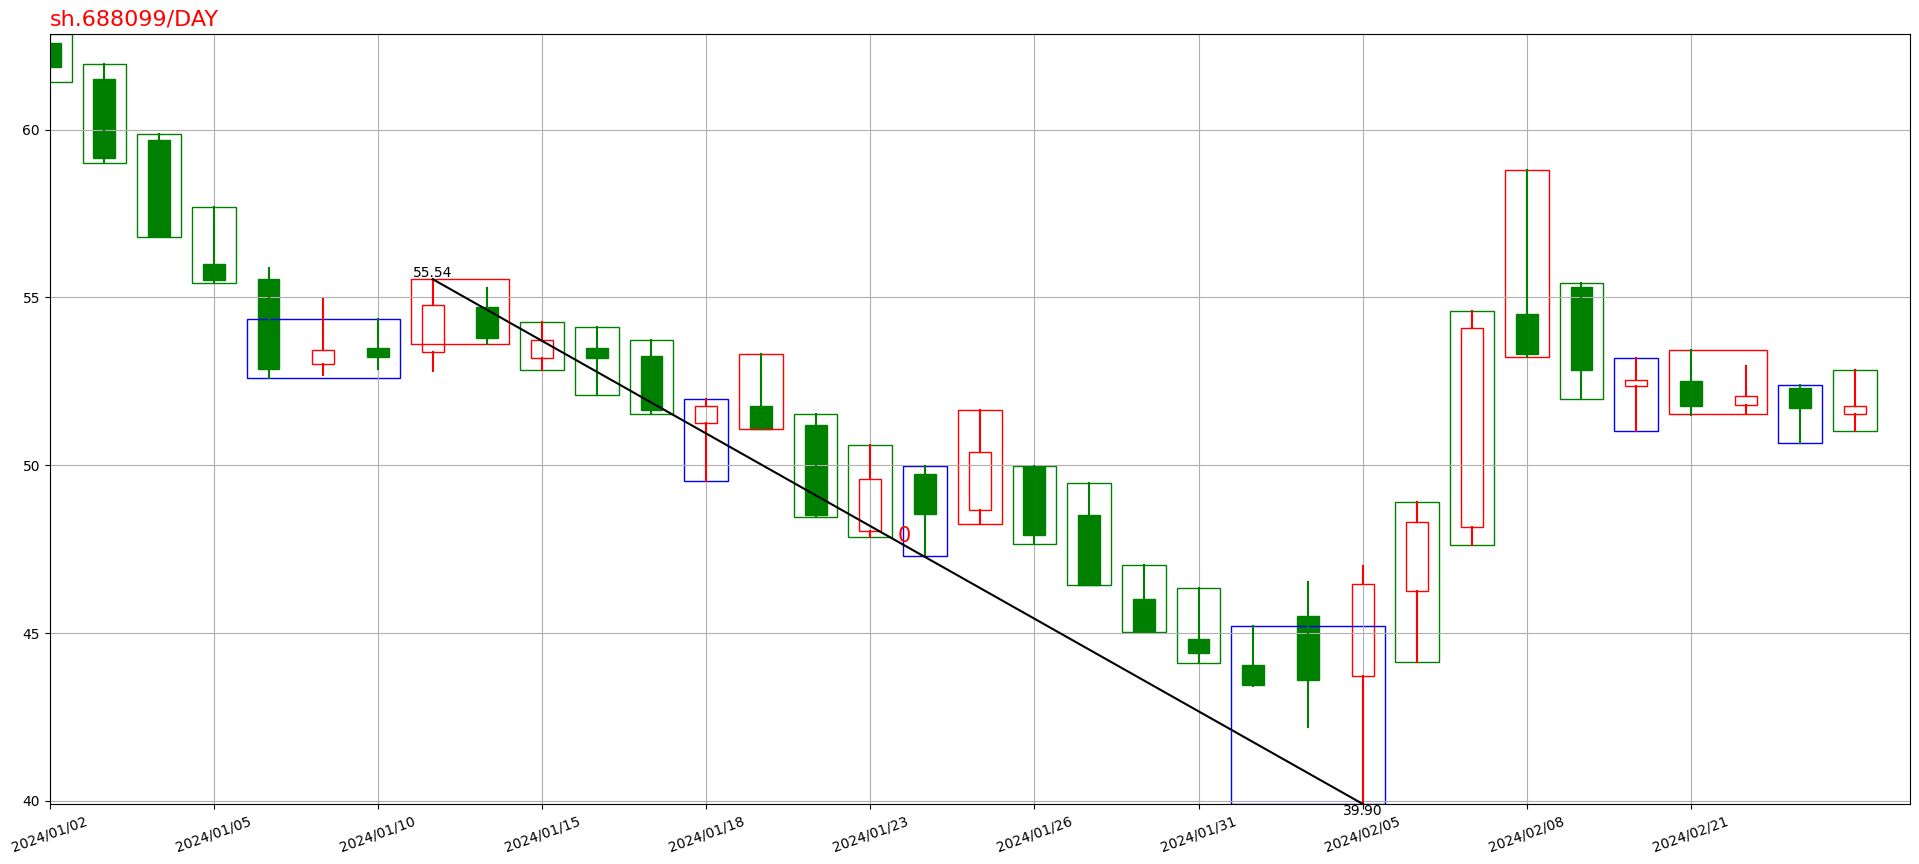

In [1]:
%matplotlib inline
from main import main
main()